# Analysis of the regularization term in forecasting

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import util
from sirds_model_visualization import calculate_performance
from util import calculate_confidence_interval

## Reading data

In [3]:
df_actuals = pd.read_csv('data/output/df_ts_epidemic_episodes.csv', index_col=0)
df_actuals.DATA = pd.to_datetime(df_actuals.DATA)
df_actuals = df_actuals.sort_values('DATA')

In [4]:
df_forecastings = pd.read_csv("data/output/df_sirds.csv")
df_forecastings.date = pd.to_datetime(df_forecastings.date)
df_forecastings = df_forecastings.sort_values(['outbreak', 'alpha', 'estimation', 'date'])

In [5]:
df_forecastings_outbreak_0 = pd.read_csv("data/output/df_sirds_outbreak_0.csv")
df_forecastings_outbreak_0.date = pd.to_datetime(df_forecastings_outbreak_0.date)
df_forecastings_outbreak_0 = df_forecastings_outbreak_0.sort_values(['days_to_fit_within_outbreak', 'estimation', 'date'])

## Extracting measures: MAE, R2 and SSE

In [6]:
df_measures = df_forecastings[['outbreak', 'alpha', 'estimation']].drop_duplicates()

In [7]:
def extract_measures(df_estimation):
    df_actual = df_actuals[df_actuals.DATA.isin(df_estimation.date)]
    size_train_period = len(df_estimation[df_estimation.train_period])
    
    mae_fit, sse_D_fit, r2_D_fit, sse_Rt_fit, r2_Rt_fit, mae_predicton, sse_D_predicton, r2_D_predicton, sse_Rt_predicton, r2_Rt_predicton, mae_predicton_month_1, sse_D_predicton_month_1, r2_D_predicton_month_1, sse_Rt_predicton_month_1, r2_Rt_predicton_month_1, mae_predicton_month_2, sse_D_predicton_month_2, r2_D_predicton_month_2, sse_Rt_predicton_month_2, r2_Rt_predicton_month_2, mae_predicton_month_3, sse_D_predicton_month_3, r2_D_predicton_month_3, sse_Rt_predicton_month_3, r2_Rt_predicton_month_3 = calculate_performance(df_actual.TAXA_OBITOS_NOVOS_MEDIA_MOVEL_7_DIAS_SIM.round(6).values, df_estimation.D_new_deaths.values, df_actual['NUMERO_REPRODUCAO_EFETIVO_SRAG_MEDIA'].round(6).values, df_estimation.reproduction_number_sird.values, size_train_period)

    return mae_fit, sse_D_fit, r2_D_fit, sse_Rt_fit, r2_Rt_fit, mae_predicton, sse_D_predicton, r2_D_predicton, sse_Rt_predicton, r2_Rt_predicton, mae_predicton_month_1, sse_D_predicton_month_1, r2_D_predicton_month_1, sse_Rt_predicton_month_1, r2_Rt_predicton_month_1, mae_predicton_month_2, sse_D_predicton_month_2, r2_D_predicton_month_2, sse_Rt_predicton_month_2, r2_Rt_predicton_month_2, mae_predicton_month_3, sse_D_predicton_month_3, r2_D_predicton_month_3, sse_Rt_predicton_month_3, r2_Rt_predicton_month_3

In [8]:
for index, item in df_measures.iterrows():
    df_forecasting = df_forecastings[(df_forecastings.outbreak == item.outbreak) & (df_forecastings.alpha == item.alpha) & (df_forecastings.estimation == item.estimation)]

    mae_fit, sse_D_fit, r2_D_fit, sse_Rt_fit, r2_Rt_fit, mae_predicton, sse_D_predicton, r2_D_predicton, sse_Rt_predicton, r2_Rt_predicton, mae_predicton_month_1, sse_D_predicton_month_1, r2_D_predicton_month_1, sse_Rt_predicton_month_1, r2_Rt_predicton_month_1, mae_predicton_month_2, sse_D_predicton_month_2, r2_D_predicton_month_2, sse_Rt_predicton_month_2, r2_Rt_predicton_month_2, mae_predicton_month_3, sse_D_predicton_month_3, r2_D_predicton_month_3, sse_Rt_predicton_month_3, r2_Rt_predicton_month_3 = extract_measures(df_forecasting)    

    df_measures.loc[index, 'mae_fit'] = mae_fit
    df_measures.loc[index, 'sse_D_fit'] = sse_D_fit
    df_measures.loc[index, 'r2_D_fit'] = r2_D_fit
    df_measures.loc[index, 'sse_Rt_fit'] = sse_Rt_fit
    df_measures.loc[index, 'r2_Rt_fit'] = r2_Rt_fit
    df_measures.loc[index, 'mae_predicton'] = mae_predicton
    df_measures.loc[index, 'sse_D_predicton'] = sse_D_predicton
    df_measures.loc[index, 'r2_D_predicton'] = r2_D_predicton
    df_measures.loc[index, 'sse_Rt_predicton'] = sse_Rt_predicton
    df_measures.loc[index, 'r2_Rt_predicton'] = r2_Rt_predicton
    df_measures.loc[index, 'mae_predicton_month_1'] = mae_predicton_month_1
    df_measures.loc[index, 'sse_D_predicton_month_1'] = sse_D_predicton_month_1
    df_measures.loc[index, 'r2_D_predicton_month_1'] = r2_D_predicton_month_1
    df_measures.loc[index, 'sse_Rt_predicton_month_1'] = sse_Rt_predicton_month_1
    df_measures.loc[index, 'r2_Rt_predicton_month_1'] = r2_Rt_predicton_month_1
    df_measures.loc[index, 'mae_predicton_month_2'] = mae_predicton_month_2
    df_measures.loc[index, 'sse_D_predicton_month_2'] = sse_D_predicton_month_2
    df_measures.loc[index, 'r2_D_predicton_month_2'] = r2_D_predicton_month_2
    df_measures.loc[index, 'sse_Rt_predicton_month_2'] = sse_Rt_predicton_month_2
    df_measures.loc[index, 'r2_Rt_predicton_month_2'] = r2_Rt_predicton_month_2
    df_measures.loc[index, 'mae_predicton_month_3'] = mae_predicton_month_3
    df_measures.loc[index, 'sse_D_predicton_month_3'] = sse_D_predicton_month_3
    df_measures.loc[index, 'r2_D_predicton_month_3'] = r2_D_predicton_month_3
    df_measures.loc[index, 'sse_Rt_predicton_month_3'] = sse_Rt_predicton_month_3
    df_measures.loc[index, 'r2_Rt_predicton_month_3'] = r2_Rt_predicton_month_3      

In [9]:
df_forecasting

,date,S,I,R,D,I_accumulated,D_new_deaths,reproduction_number_sird,I_new_cases,days_between_infections,case_fatality_probability,loss_immunity_in_days,train_period,outbreak,alpha,estimation
585365,2020-02-16,99999.999509,0.000491,0.000000,0.000000e+00,0.000491,NaN,2.524703,NaN,3.16869,0.000812,89.999999,True,8.0,10.0,19.0
585366,2020-02-17,99999.999335,0.000597,0.000069,5.614517e-08,0.000666,5.614517e-08,2.524703,0.000174,3.16869,0.000814,89.999999,True,8.0,10.0,19.0
585367,2020-02-18,99999.999128,0.000723,0.000150,1.232736e-07,0.000874,6.712845e-08,2.524703,0.000208,3.16869,0.000816,89.999999,True,8.0,10.0,19.0
585368,2020-02-19,99999.998878,0.000874,0.000247,2.046177e-07,0.001126,8.134409e-08,2.524703,0.000252,3.16869,0.000819,89.999999,True,8.0,10.0,19.0
585369,2020-02-20,99999.998577,0.001059,0.000364,3.034858e-07,0.001431,9.886808e-08,2.524703,0.000305,3.16869,0.000821,89.999999,True,8.0,10.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586435,2023-01-21,21277.279460,6425.829912,71770.217617,5.266730e+02,821619.923003,7.947754e-02,1.001829,804.151383,1.69961,0.000099,89.999999,False,8.0,10.0,19.0
586436,2023-01-22,21270.627338,6426.928374,71775.691776,5.267525e+02,822424.071709,7.950197e-02,1.001514,804.148706,1.69961,0.000099,89.999999,False,8.0,10.0,19.0
586437,2023-01-23,21264.028584,6427.777305,71781.362072,5.268320e+02,823228.217738,7.952641e-02,1.001201,804.146029,1.69961,0.000099,89.999999,False,8.0,10.0,19.0
586438,2023-01-24,21257.564601,6428.379178,71787.144640,5.269116e+02,824032.285783,7.954315e-02,1.000890,804.068045,1.69961,0.000099,89.999999,False,8.0,10.0,19.0


In [10]:
df_actual = df_actuals[df_actuals.DATA.isin(df_forecasting.date)]
size_train_period = len(df_forecasting[df_forecasting.train_period])

In [11]:
df_actual

,DATA,OBITOS_NOVOS_PAINEL,OBITOS_ACUMULADO_PAINEL,CASOS_NOVOS_PAINEL,CASOS_ACUMULADO_PAINEL,day_of_week,CASOS_NOVOS_MEDIA_MOVEL_7_DIAS_PAINEL,OBITOS_NOVOS_MEDIA_MOVEL_7_DIAS_PAINEL,OBITOS_NOVOS_SIM,OBITOS_ACUMULADO_SIM,...,NUMERO_REPRODUCAO_EFETIVO_SRAG_QUANTIL_0.025,NUMERO_REPRODUCAO_EFETIVO_SRAG_MEDIANA,NUMERO_REPRODUCAO_EFETIVO_SRAG_QUANTIL_0.975,TAXA_FATALIDADE,TAXA_FATALIDADE_SRAG,NOVOS_OBITOS_MEDIA_MOVEL_7_DIAS_SRAG,NOVOS_CASOS_MEDIA_MOVEL_7_DIAS_SRAG,EPIDEMIC_EPISODE,ONSET_NUMERO_REPRODUCAO_EFETIVO_MEDIA,ONSET_TAXA_OBITOS_NOVOS_MEDIA_MOVEL_7_DIAS
0,2020-02-16,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.000000,5.000000,NaN,NaN,NaN
1,2020-02-17,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.000000,7.500000,NaN,NaN,NaN
2,2020-02-18,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.000000,7.666667,NaN,NaN,NaN
3,2020-02-19,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.000000,7.000000,NaN,NaN,NaN
4,2020-02-20,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.000000,7.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,2022-12-27,230.0,693199.0,35898.0,36226287.0,1.0,32075.285714,131.285714,126.0,702158.0,...,NaN,NaN,NaN,0.317134,18.354832,124.000000,470.142857,3.0,NaN,8.0
1046,2022-12-28,363.0,693562.0,38434.0,36264721.0,2.0,31468.571429,157.285714,102.0,702260.0,...,NaN,NaN,NaN,0.211361,18.059182,118.571429,465.428571,3.0,NaN,8.0
1047,2022-12-29,172.0,693734.0,37694.0,36302415.0,3.0,29938.571429,154.571429,104.0,702364.0,...,NaN,NaN,NaN,0.226545,18.957897,116.428571,447.000000,3.0,NaN,8.0
1048,2022-12-30,119.0,693853.0,28866.0,36331281.0,4.0,29563.428571,158.571429,88.0,702452.0,...,NaN,NaN,NaN,0.189866,18.545888,111.142857,434.571429,3.0,NaN,8.0


In [12]:
size_train_period

985

## Analysing measures: MAE, R2, and SSE 

In [13]:
df_measures.groupby(['outbreak', 'alpha']).describe()[['mae_predicton']]

mae_predicton                                            \
                        count       mean        std       min       25%   
outbreak alpha                                                            
0.0      0.000           20.0   9.879002   6.301744  1.781325  4.248823   
         0.001           20.0  17.313544  10.070474  5.017104  8.001523   
         0.010           20.0  15.997840   8.944193  3.588500  8.993689   
         0.100           20.0  12.702463  11.360763  3.117422  3.749461   
         1.000           20.0  21.032752  16.751139  2.173088  4.439833   
         10.000          20.0  17.488196  15.979029  3.498760  4.428389   
1.0      0.000           20.0   0.120513   0.008244  0.097651  0.116204   
         0.001           20.0   0.986873   0.778802  0.057281  0.500502   
         0.010           20.0   6.338066   7.031382  0.626826  0.917684   
         0.100           20.0   1.313850   1.766768  0.587240  0.625542   
         1.000           20.0   5.204402  10.704403  0.586064  0.623034   
         10.000          20.0   1.524049   4.035666  0.573267  0.621749   
2.0      0.000           20.0   1.243361   1.414144  0.224791  0.394954   
         0.001           20.0   5.174426   4.254482  0.327332  1.492719   
         0.010           20.0  11.742487  10.340462  0.508099  1.059057   
         0.100           20.0   4.198428   9.810973  0.513544  0.608500   
         1.000           20.0   0.581252   0.068787  0.513866  0.567984   
         10.000          20.0   0.527199   0.024566  0.506376  0.514633   
3.0      0.000           20.0   0.696995   0.074244  0.607928  0.652034   
         0.001           20.0   1.722313   2.030409  0.467533  0.745920   
         0.010           20.0   1.511138   1.358190  0.497759  0.893692   
         0.100           20.0   0.916573   0.152833  0.711083  0.805281   
         1.000           20.0   0.841447   0.023194  0.804621  0.821039   
         10.000          20.0   0.820559   0.024310  0.803922  0.803922   
4.0      0.000           20.0   0.594458   0.157410  0.288031  0.450802   
         0.001           20.0   1.039522   0.757351  0.470937  0.671621   
         0.010           20.0   1.613279   1.911851  0.496285  0.897634   
         0.100           20.0   1.094667   1.170025  0.744829  0.755471   
         1.000           20.0   0.782987   0.076688  0.739808  0.754572   
         10.000          20.0   0.755766   0.001071  0.752544  0.754858   
5.0      0.000           20.0   0.445741   0.193261  0.203453  0.304937   
         0.001           20.0   1.064468   0.778983  0.429206  0.691341   
         0.010           20.0   1.048649   1.159039  0.252882  0.435225   
         0.100           20.0   1.194104   1.973644  0.320263  0.639761   
         1.000           20.0   1.980818   3.140900  0.525032  0.672716   
         10.000          20.0   3.564241   5.169968  0.427736  0.609724   
6.0      0.000           20.0   2.878892   5.586194  0.521524  0.959941   
         0.001           20.0   7.052638  11.333433  0.647939  0.954823   
         0.010           20.0   4.151922   7.767563  0.691734  1.050302   
         0.100           20.0   4.553481  13.744929  0.883435  1.067118   
         1.000           20.0   3.617715  11.154440  1.114415  1.114960   
         10.000          20.0   1.115032   0.000899  1.114612  1.114759   
7.0      0.000           20.0   0.667820   0.217367  0.453434  0.494858   
         0.001           20.0   3.287488   9.718716  0.629534  0.765039   
         0.010           20.0   1.187801   0.454735  0.507103  0.790795   
         0.100           20.0   1.127990   0.330367  0.652044  0.801946   
         1.000           20.0   1.843590   1.740055  1.438475  1.454807   
         10.000          20.0   1.452150   0.014821  1.389237  1.454810   
8.0      0.000           20.0   1.013634   0.466682  0.718764  0.881783   
         0.001           20.0   1.242861   1.534962  0.722884  0.802742   
         0.010           20.0   2.273208 

In [14]:
df_measures.groupby(['outbreak', 'alpha']).describe()[['mae_fit']]

mae_fit                                                    \
                  count      mean       std       min       25%       50%   
outbreak alpha                                                              
0.0      0.000     20.0  0.400630  0.029251  0.360626  0.377864  0.400308   
         0.001     20.0  0.421712  0.029393  0.385930  0.394977  0.418227   
         0.010     20.0  0.429493  0.052431  0.385554  0.385710  0.429978   
         0.100     20.0  0.452064  0.095553  0.385574  0.386404  0.430076   
         1.000     20.0  0.433589  0.122612  0.385589  0.385701  0.407673   
         10.000    20.0  0.407856  0.022699  0.385655  0.385750  0.407819   
1.0      0.000     20.0  0.059168  0.005262  0.052778  0.054583  0.058395   
         0.001     20.0  0.795796  0.059782  0.661580  0.759330  0.807384   
         0.010     20.0  0.991589  0.196257  0.664866  0.880578  0.956645   
         0.100     20.0  0.895834  0.190789  0.680166  0.769156  0.884235   
         1.000     20.0  1.942230  3.886680  0.890768  0.891738  0.892266   
         10.000    20.0  2.885094  8.883316  0.890926  0.892269  0.893677   
2.0      0.000     20.0  0.059301  0.002111  0.056470  0.057581  0.058933   
         0.001     20.0  0.679084  0.247825  0.374446  0.509566  0.594647   
         0.010     20.0  1.128448  0.267482  0.844504  0.916319  1.170119   
         0.100     20.0  1.671064  1.733220  0.553592  0.875776  0.981351   
         1.000     20.0  0.920666  0.057168  0.818489  0.904508  0.922259   
         10.000    20.0  0.879687  0.051179  0.850697  0.850697  0.850804   
3.0      0.000     20.0  0.070706  0.001549  0.068222  0.069466  0.070929   
         0.001     20.0  0.876013  0.263796  0.392431  0.637520  0.901378   
         0.010     20.0  1.313913  1.038147  0.602991  0.998990  1.095430   
         0.100     20.0  0.934104  0.223640  0.667605  0.777908  0.893228   
         1.000     20.0  0.890641  0.146012  0.776456  0.781307  0.875263   
         10.000    20.0  0.821156  0.070670  0.777355  0.777609  0.777609   
4.0      0.000     20.0  0.076466  0.002338  0.072130  0.074707  0.076574   
         0.001     20.0  0.997753  0.291382  0.503835  0.840455  0.970781   
         0.010     20.0  2.055450  2.434549  0.561481  0.970482  1.135517   
         0.100     20.0  1.828183  2.140254  0.738682  0.853824  1.007658   
         1.000     20.0  0.967767  0.234748  0.769156  0.789836  0.937698   
         10.000    20.0  0.912788  0.111887  0.768975  0.896839  0.937698   
5.0      0.000     20.0  0.099213  0.007770  0.088665  0.092909  0.096521   
         0.001     20.0  1.034488  0.245590  0.672483  0.810548  1.061694   
         0.010     20.0  1.126676  0.263171  0.743720  0.945861  1.094185   
         0.100     20.0  1.779333  1.065262  0.964482  1.194608  1.419334   
         1.000     20.0  1.864245  0.973631  1.194318  1.255599  1.259170   
         10.000    20.0  2.337576  1.611373  1.258020  1.262403  1.262403   
6.0      0.000     20.0  0.118084  0.025066  0.093907  0.097052  0.103096   
         0.001     20.0  1.689267  1.027814  0.745116  1.116380  1.296968   
         0.010     20.0  2.198456  1.895015  0.827666  1.079694  1.315681   
         0.100     20.0  1.731197  1.258954  0.808336  1.165808  1.391591   
         1.000     20.0  1.932281  2.112182  1.017469  1.062748  1.084002   
         10.000    20.0  1.326153  1.233414  1.017406  1.017498  1.057484   
7.0      0.000     20.0  0.145986  0.003998  0.140849  0.144033  0.144819   
         0.001     20.0  1.523524  1.273745  0.892524  1.110495  1.287308   
         0.010     20.0  1.743835  1.429696  0.788428  1.098585  1.342068   
         0.100     20.0  1.318430  0.341310  0.996575  1.157320  1.254671   
         1.000     20.0  1.710130  2.029004  1.060638  1.076427  1.128549   
         10.000    20.0  1.376160  1.286069  1.076277  1.076369  1.076398   
8.0      0.000     20.0  0.160937  0.010136  0.153067  0.157488  0.158304   
         0.0

0.0


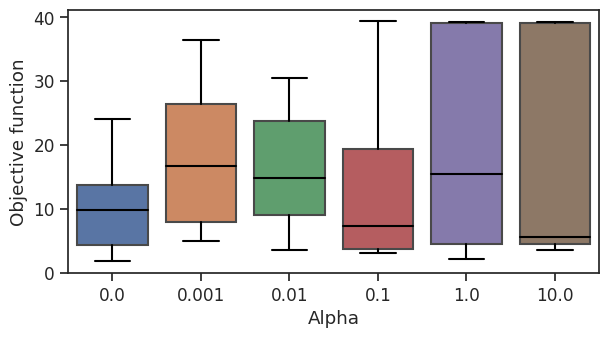

1.0


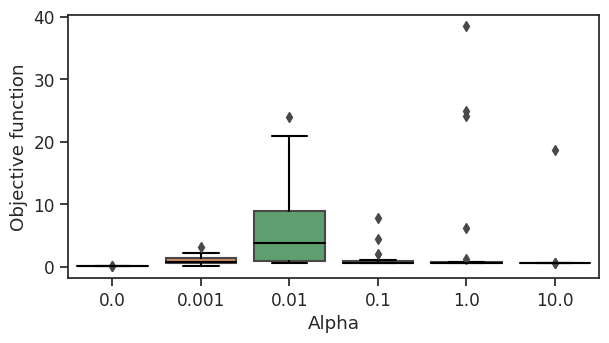

2.0


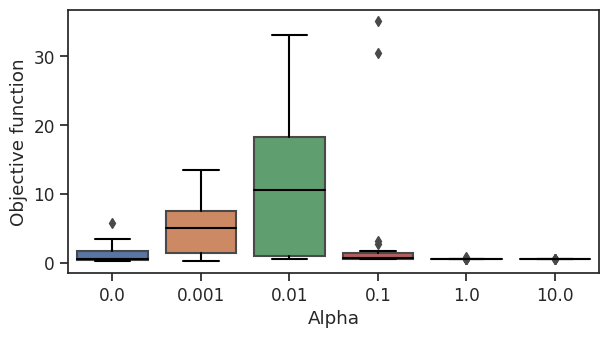

3.0


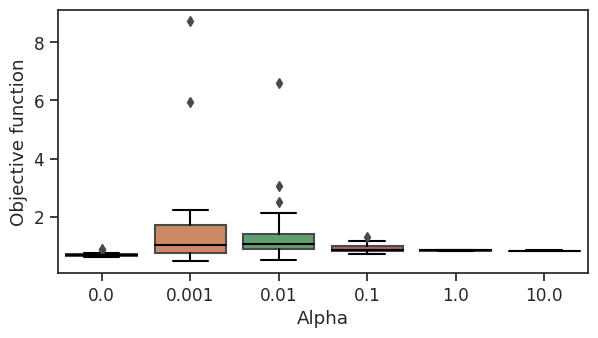

4.0


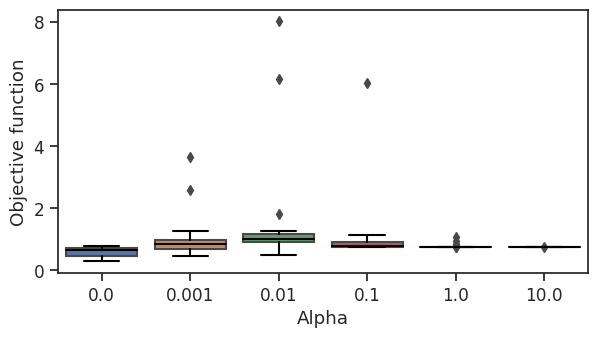

5.0


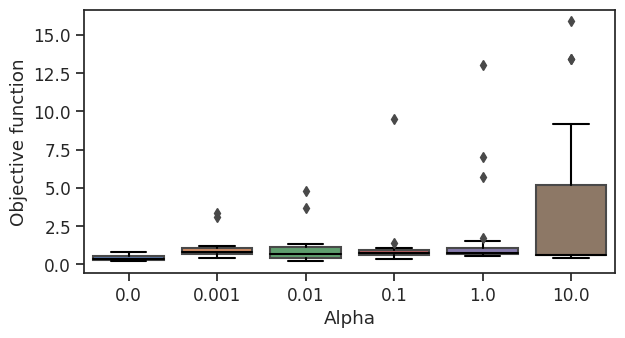

6.0


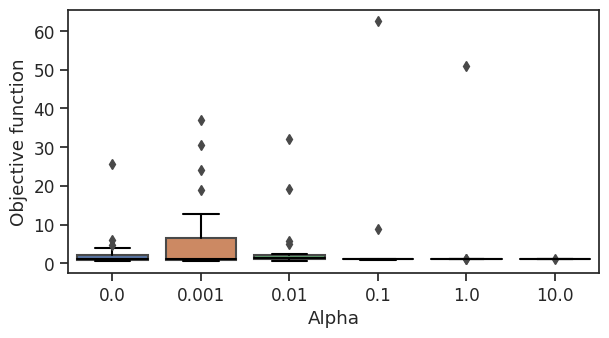

7.0


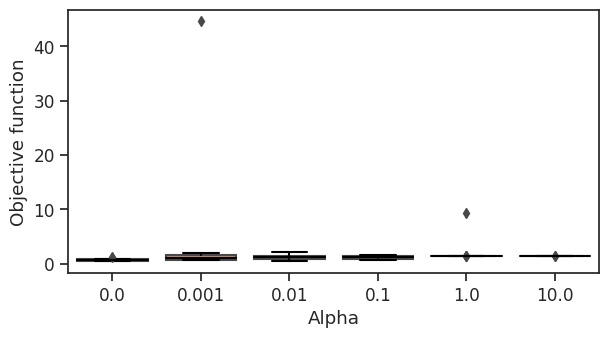

8.0


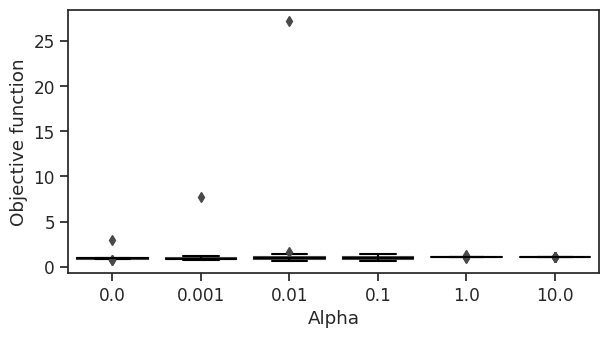

In [15]:
sns.set(font_scale=1.1)
sns.set_style("ticks")

for outbreak in df_measures.outbreak.drop_duplicates():    
    print(outbreak)
    
    df_measures_outbreak = df_measures[df_measures.outbreak == outbreak]
    
    fig, ax = plt.subplots(figsize=(util.centimeter_to_inch(17.4), util.centimeter_to_inch(8.7)))
    
    sns.boxplot(x=df_measures_outbreak.alpha, y=df_measures_outbreak.mae_predicton)
    
    plt.ylabel('Objective function')
    plt.xlabel('Alpha')
    
    plt.setp(ax.lines, color='black')
    plt.setp(ax.artists, edgecolor = 'black', facecolor='white')
    
    # plt.savefig('images/boxplot_sirds_result.eps', bbox_inches="tight")
    plt.show()

## Defining confidence interval for alpha zero

In [16]:
df_forecastings_confidence_interval = pd.DataFrame()

for outbreak in df_forecastings.outbreak.unique():
    df_forecasting_outbreak = df_forecastings[(df_forecastings.alpha == 0) & (df_forecastings.outbreak == outbreak)]
    for date in df_forecasting_outbreak.date.unique(): 
        try:
            actual_death_rate = df_actuals[df_actuals.DATA == date].TAXA_OBITOS_NOVOS_MEDIA_MOVEL_7_DIAS_SIM.values[0]
            
            train_period = df_forecasting_outbreak[df_forecasting_outbreak.date == date].train_period.values[0]
            
            estimated_new_deaths = df_forecasting_outbreak[df_forecasting_outbreak.date == date].D_new_deaths.values            
            estimated_new_deaths_mean = np.mean(estimated_new_deaths)            
            estimated_new_deaths_lower_bound, estimated_new_deaths_upper_bound = calculate_confidence_interval(estimated_new_deaths)
            
            if (actual_death_rate >=  estimated_new_deaths_lower_bound) & (actual_death_rate <= estimated_new_deaths_upper_bound):
                actual_inside_confidence_interval = True
            else:
                actual_inside_confidence_interval = False                            
                            
            new_item = {'outbreak': outbreak, 'date': date, 'train_period': train_period,  'estimated_new_deaths_mean': estimated_new_deaths_mean, 'estimated_new_deaths_lower_bound': estimated_new_deaths_lower_bound, 'estimated_new_deaths_upper_bound': estimated_new_deaths_upper_bound, 'actual_death_rate': actual_death_rate, 'actual_inside_confidence_interval': actual_inside_confidence_interval}
            
            df_forecastings_confidence_interval = pd.concat([df_forecastings_confidence_interval, pd.DataFrame.from_records([new_item])])
        except IndexError:
            pass

In [17]:
df_forecastings_confidence_interval

,outbreak,date,train_period,estimated_new_deaths_mean,estimated_new_deaths_lower_bound,estimated_new_deaths_upper_bound,actual_death_rate,actual_inside_confidence_interval
0,0.0,2020-02-16,True,NaN,NaN,NaN,0.000000,False
0,0.0,2020-02-17,True,0.000008,0.000007,0.000008,0.000000,False
0,0.0,2020-02-18,True,0.000009,0.000009,0.000010,0.000000,False
0,0.0,2020-02-19,True,0.000011,0.000011,0.000011,0.000000,False
0,0.0,2020-02-20,True,0.000013,0.000013,0.000014,0.000000,False
...,...,...,...,...,...,...,...,...
0,8.0,2022-12-27,False,0.046719,0.017123,0.103535,0.064583,True
0,8.0,2022-12-28,False,0.049002,0.017140,0.110450,0.059939,True
0,8.0,2022-12-29,False,0.051401,0.017270,0.117348,0.057829,True
0,8.0,2022-12-30,False,0.053899,0.017351,0.125447,0.055226,True


In [18]:
df_forecastings_confidence_interval.dropna().groupby(['outbreak', 'train_period', 'actual_inside_confidence_interval']).count()[['date']]

date
outbreak train_period actual_inside_confidence_interval      
0.0      False        False                                86
                      True                                  4
         True         False                                32
                      True                                  3
1.0      False        False                                86
                      True                                  4
         True         False                               108
                      True                                 20
2.0      False        False                                90
         True         False                               246
                      True                                 24
3.0      False        False                                90
         True         False                               310
                      True                                 20
4.0      False        False                                87
                      True                                  3
         True         False                               341
                      True                                 28
5.0      False        False                                63
                      True                                 27
         True         False                               383
                      True                                 75
6.0      False        False                                45
                      True                                 45
         True         False                               550
                      True                                137
7.0      False        False                                85
                      True                                  5
         True         False                               734
                      True                                 73
8.0      False        False                                53
                      True                                 12
         True         False                               886
                      True                                 98

In [19]:
percentual_error_trainning = df_forecastings_confidence_interval[df_forecastings_confidence_interval.train_period == True][['outbreak', 'estimated_new_deaths_mean', 'actual_death_rate']].dropna().groupby(['outbreak']).sum()
percentual_error_trainning['error'] = percentual_error_trainning.estimated_new_deaths_mean - percentual_error_trainning.actual_death_rate
percentual_error_trainning['percentual_error'] = (percentual_error_trainning.error / percentual_error_trainning.actual_death_rate) * 100 

In [20]:
percentual_error_trainning

,estimated_new_deaths_mean,actual_death_rate,error,percentual_error
outbreak,,,,
0.0,0.027521,0.026117,0.001405,5.378079
1.0,33.247000,33.503422,-0.256422,-0.765361
2.0,85.909038,85.765442,0.143595,0.167428
3.0,108.637909,108.684775,-0.046866,-0.043121
4.0,130.210288,130.068056,0.142232,0.109352
5.0,235.837459,236.383945,-0.546486,-0.231186
6.0,314.014622,313.785303,0.229319,0.073081
7.0,336.287843,334.935089,1.352754,0.403885
8.0,344.978982,343.011208,1.967774,0.573676


In [21]:
percentual_error_forecasting = df_forecastings_confidence_interval[df_forecastings_confidence_interval.train_period == False][['outbreak', 'estimated_new_deaths_mean', 'actual_death_rate']].dropna().groupby(['outbreak']).sum()
percentual_error_forecasting['error'] = percentual_error_forecasting.estimated_new_deaths_mean - percentual_error_forecasting.actual_death_rate
percentual_error_forecasting['percentual_error'] = (percentual_error_forecasting.error / percentual_error_forecasting.actual_death_rate) * 100 

In [22]:
percentual_error_forecasting

,estimated_new_deaths_mean,actual_death_rate,error,percentual_error
outbreak,,,,
0.0,329.318641,31.992893,297.325748,929.349376
1.0,38.621292,39.945546,-1.324254,-3.315147
2.0,84.136963,39.590201,44.546762,112.519665
3.0,35.446578,85.150345,-49.703767,-58.371774
4.0,55.124458,107.232707,-52.108249,-48.593615
5.0,42.926078,59.024400,-16.098322,-27.274012
6.0,55.362754,20.594714,34.768041,168.820219
7.0,9.131729,6.297287,2.834443,45.010537
8.0,1.529609,2.822143,-1.292534,-45.799750


In [23]:
df_forecastings

,date,S,I,R,D,I_accumulated,D_new_deaths,reproduction_number_sird,I_new_cases,days_between_infections,case_fatality_probability,loss_immunity_in_days,train_period,outbreak,alpha,estimation
0,2020-02-16,99999.988027,0.011973,0.000000,0.000000,0.011973,NaN,2.515196,NaN,3.180667,0.005061,250.947207,True,0.0,0.0,0.0
1,2020-02-17,99999.983885,0.014470,0.001637,0.000008,0.016119,0.000008,2.515196,0.004146,3.180667,0.005061,250.947207,True,0.0,0.0,0.0
2,2020-02-18,99999.978885,0.017489,0.003608,0.000018,0.021129,0.000010,2.515196,0.005010,3.180667,0.005061,250.947207,True,0.0,0.0,0.0
3,2020-02-19,99999.972850,0.021136,0.005984,0.000031,0.027183,0.000012,2.515195,0.006054,3.180667,0.005061,250.947207,True,0.0,0.0,0.0
4,2020-02-20,99999.965561,0.025544,0.008850,0.000045,0.034501,0.000015,2.515195,0.007318,3.180667,0.005061,250.947207,True,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586435,2023-01-21,21277.279460,6425.829912,71770.217617,526.673010,821619.923003,0.079478,1.001829,804.151383,1.699610,0.000099,89.999999,False,8.0,10.0,19.0
586436,2023-01-22,21270.627338,6426.928374,71775.691776,526.752512,822424.071709,0.079502,1.001514,804.148706,1.699610,0.000099,89.999999,False,8.0,10.0,19.0
586437,2023-01-23,21264.028584,6427.777305,71781.362072,526.832039,823228.217738,0.079526,1.001201,804.146029,1.699610,0.000099,89.999999,False,8.0,10.0,19.0
586438,2023-01-24,21257.564601,6428.379178,71787.144640,526.911582,824032.285783,0.079543,1.000890,804.068045,1.699610,0.000099,89.999999,False,8.0,10.0,19.0


In [24]:
df_actuals['TAXA_OBITOS_NOVOS_MEDIA_MOVEL_7_DIAS_SIM']

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
1045    0.064583
1046    0.059939
1047    0.057829
1048    0.055226
1049    0.054382
Name: TAXA_OBITOS_NOVOS_MEDIA_MOVEL_7_DIAS_SIM, Length: 1050, dtype: float64

In [25]:
df_forecastings[(df_forecastings.alpha == 0) & (df_forecastings.train_period == False) & (df_forecastings.outbreak == 0)].estimation.unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19.])

In [26]:
NOISE = 0.000001

percentual_error_forecasting_by_months = pd.DataFrame()

df_predictions = df_forecastings[(df_forecastings.alpha == 0) & (df_forecastings.train_period == False)]
for outbreak in df_predictions.outbreak.unique():
    df_predictions_outbreak = df_predictions[df_predictions.outbreak == outbreak].reset_index(drop=True)
    for month, day_bounds in zip([1, 2, 3], [(0,30), (30,60), (60,90)]):
        date_min = df_predictions_outbreak[day_bounds[0] : day_bounds[1]].date.min()
        date_max = df_predictions_outbreak[day_bounds[0] : day_bounds[1]].date.max()
        
        total_actual = df_actuals[(df_actuals.DATA >= date_min) & (df_actuals.DATA < date_max)]['TAXA_OBITOS_NOVOS_MEDIA_MOVEL_7_DIAS_SIM'].sum() + NOISE
        
        list_absolute_error = []
        list_percentual_absolute_error = []
        
        for estimation in df_predictions_outbreak.estimation.unique():
            df_predictions_outbreak_month_estimation = df_predictions_outbreak[(df_predictions_outbreak.date >= date_min) & (df_predictions_outbreak.date < date_max) & (df_predictions_outbreak.estimation == estimation)]
            total_estimation = df_predictions_outbreak_month_estimation['D_new_deaths'].sum() + NOISE
            absolute_error = abs(total_estimation - total_actual)
            percentual_absolute_error = abs(absolute_error / total_actual) * 100
            list_absolute_error.append(absolute_error)
            list_percentual_absolute_error.append(percentual_absolute_error)
        
        mean_absolute_error = np.mean(list_absolute_error)
        lower_bound_absolute_error, upper_bound_absolute_error = util.calculate_confidence_interval(list_absolute_error)
        
        mean_percentual_absolute_error = np.mean(list_percentual_absolute_error)
        lower_bound_percentual_absolute_error, upper_bound_percentual_absolute_error = util.calculate_confidence_interval(list_percentual_absolute_error)        
        
        new_item = {'outbreak': outbreak, 'month': month, 'mean_absolute_error': mean_absolute_error, 'lower_bound_absolute_error': lower_bound_absolute_error, 'upper_bound_absolute_error': upper_bound_absolute_error, 'mean_percentual_absolute_error': mean_percentual_absolute_error, 'lower_percentual_percentual_absolute_error': lower_bound_percentual_absolute_error, 'upper_percentual_percentual_absolute_error': upper_bound_percentual_absolute_error}
            
        percentual_error_forecasting_by_months = pd.concat([percentual_error_forecasting_by_months, pd.DataFrame.from_records([new_item])])

In [27]:
df_actuals[(df_actuals.DATA >= date_min) & (df_actuals.DATA < date_max)]['TAXA_OBITOS_NOVOS_MEDIA_MOVEL_7_DIAS_SIM']

1045    0.064583
1046    0.059939
1047    0.057829
1048    0.055226
1049    0.054382
Name: TAXA_OBITOS_NOVOS_MEDIA_MOVEL_7_DIAS_SIM, dtype: float64

In [28]:
df_predictions_outbreak[day_bounds[0] : day_bounds[1]]

,date,S,I,R,D,I_accumulated,D_new_deaths,reproduction_number_sird,I_new_cases,days_between_infections,case_fatality_probability,loss_immunity_in_days,train_period,outbreak,alpha,estimation
60,2022-12-27,34987.845328,920.656495,63744.311105,347.187071,214368.269684,0.015406,1.059009,121.616408,2.63674,0.000134,310.682781,False,8.0,0.0,0.0
61,2022-12-28,35069.993027,927.916196,63654.888175,347.202601,214491.161527,0.015530,1.061549,122.891843,2.63674,0.000134,310.682781,False,8.0,0.0,0.0
62,2022-12-29,35150.579445,935.521918,63566.680381,347.218257,214615.328805,0.015655,1.064041,124.167278,2.63674,0.000134,310.682781,False,8.0,0.0,0.0
63,2022-12-30,35229.604580,943.473661,63479.687722,347.234037,214740.771519,0.015780,1.066486,125.442713,2.63674,0.000134,310.682781,False,8.0,0.0,0.0
64,2022-12-31,35307.012434,951.774027,63393.963590,347.249949,214867.551322,0.015913,1.068884,126.779804,2.63674,0.000134,310.682781,False,8.0,0.0,0.0
65,2023-01-01,35382.679750,960.428742,63309.625496,347.266012,214995.803922,0.016063,1.071232,128.252599,2.63674,0.000134,310.682781,False,8.0,0.0,0.0
66,2023-01-02,35456.602118,969.438011,63226.677646,347.282226,215125.534170,0.016214,1.073528,129.730249,2.63674,0.000134,310.682781,False,8.0,0.0,0.0
67,2023-01-03,35528.779538,978.801834,63145.120037,347.298591,215256.742068,0.016365,1.075771,131.207898,2.63674,0.000134,310.682781,False,8.0,0.0,0.0
68,2023-01-04,35599.200142,988.520737,63064.964013,347.315108,215389.440832,0.016517,1.077961,132.698764,2.63674,0.000134,310.682781,False,8.0,0.0,0.0
69,2023-01-05,35667.728582,998.600713,62986.338908,347.331797,215523.781177,0.016689,1.080097,134.340345,2.63674,0.000134,310.682781,False,8.0,0.0,0.0


In [29]:
percentual_error_forecasting_by_months

,outbreak,month,mean_absolute_error,lower_bound_absolute_error,upper_bound_absolute_error,mean_percentual_absolute_error,lower_percentual_percentual_absolute_error,upper_percentual_percentual_absolute_error
0,0.0,1,3.100729,2.549987,3.614778,136.004262,113.112262,158.867188
0,0.0,2,165.982661,109.797913,221.600974,1275.380830,834.430899,1690.569684
0,0.0,3,120.046171,88.818700,154.536870,777.444248,584.075431,1016.803677
0,1.0,1,0.967475,0.899811,1.028064,6.675136,6.231751,7.124778
0,1.0,2,1.261027,1.087625,1.422009,9.201406,7.985399,10.348196
0,1.0,3,0.930357,0.723643,1.137135,8.847850,6.900794,10.818151
0,2.0,1,2.361177,1.568141,3.240412,27.876423,18.359777,39.670852
0,2.0,2,12.463466,6.621414,19.475214,92.188443,50.142857,153.000156
0,2.0,3,27.717536,14.815075,43.078663,171.577144,92.788613,269.286186
0,3.0,1,2.258433,1.996217,2.569181,13.980158,12.262748,15.909036


### Defining confidence interval for outbreak zero

In [30]:
df_forecastings_confidence_interval_outbreak_0 = pd.DataFrame()

for days_to_fit_within_outbreak in df_forecastings_outbreak_0.days_to_fit_within_outbreak.unique():
    df_forecasting_days_to_fit = df_forecastings_outbreak_0[df_forecastings_outbreak_0.days_to_fit_within_outbreak == days_to_fit_within_outbreak]
    for date in df_forecasting_days_to_fit.date.unique(): 
        try:
            actual_death_rate = df_actuals[df_actuals.DATA == date].TAXA_OBITOS_NOVOS_MEDIA_MOVEL_7_DIAS_SIM.values[0]
            
            train_period = df_forecasting_days_to_fit[df_forecasting_days_to_fit.date == date].train_period.values[0]
            
            estimated_new_deaths = df_forecasting_days_to_fit[df_forecasting_days_to_fit.date == date].D_new_deaths.values            
            estimated_new_deaths_mean = np.mean(estimated_new_deaths)            
            estimated_new_deaths_lower_bound, estimated_new_deaths_upper_bound = calculate_confidence_interval(estimated_new_deaths)
            
            if (actual_death_rate >=  estimated_new_deaths_lower_bound) & (actual_death_rate <= estimated_new_deaths_upper_bound):
                actual_inside_confidence_interval = True
            else:
                actual_inside_confidence_interval = False                            
                            
            new_item = {'days_to_fit_within_outbreak': days_to_fit_within_outbreak, 'outbreak': outbreak, 'date': date, 'train_period': train_period,  'estimated_new_deaths_mean': estimated_new_deaths_mean, 'estimated_new_deaths_lower_bound': estimated_new_deaths_lower_bound, 'estimated_new_deaths_upper_bound': estimated_new_deaths_upper_bound, 'actual_death_rate': actual_death_rate, 'actual_inside_confidence_interval': actual_inside_confidence_interval}
            
            df_forecastings_confidence_interval_outbreak_0 = pd.concat([df_forecastings_confidence_interval_outbreak_0, pd.DataFrame.from_records([new_item])])
        except IndexError:
            pass

In [38]:
df_forecastings_outbreak_0.columns

Index(['date', 'S', 'I', 'R', 'D', 'I_accumulated', 'D_new_deaths',
       'reproduction_number_sird', 'I_new_cases', 'days_between_infections',
       'case_fatality_probability', 'loss_immunity_in_days', 'train_period',
       'outbreak', 'alpha', 'estimation', 'days_to_fit_within_outbreak'],
      dtype='object')

In [57]:
percentual_error_forecasting_by_months_outbreak_0 = pd.DataFrame()

df_predictions = df_forecastings_outbreak_0[(df_forecastings_outbreak_0.alpha == 0) & (df_forecastings_outbreak_0.train_period == False) & (df_forecastings_outbreak_0.outbreak == 0)]
for days_to_fit_within_outbreak in df_predictions.days_to_fit_within_outbreak.unique():
    df_predictions_days_to_fit_within_outbreak = df_predictions[df_predictions.days_to_fit_within_outbreak == days_to_fit_within_outbreak].reset_index(drop=True)
    for month, day_bounds in zip([1, 2, 3], [(0,30), (30,60), (60,90)]):
        date_min = df_predictions_days_to_fit_within_outbreak[day_bounds[0] : day_bounds[1]].date.min()
        date_max = df_predictions_days_to_fit_within_outbreak[day_bounds[0] : day_bounds[1]].date.max()
        
        total_actual = df_actuals[(df_actuals.DATA >= date_min) & (df_actuals.DATA < date_max)]['TAXA_OBITOS_NOVOS_MEDIA_MOVEL_7_DIAS_SIM'].sum() + NOISE
        
        list_absolute_error = []
        list_percentual_absolute_error = []
        
        for estimation in df_predictions_days_to_fit_within_outbreak.estimation.unique():
            df_predictions_outbreak_month_estimation = df_predictions_days_to_fit_within_outbreak[(df_predictions_days_to_fit_within_outbreak.date >= date_min) & (df_predictions_days_to_fit_within_outbreak.date < date_max) & (df_predictions_days_to_fit_within_outbreak.estimation == estimation)]
            total_estimation = df_predictions_outbreak_month_estimation['D_new_deaths'].sum() + NOISE
            absolute_error = abs(total_estimation - total_actual)
            percentual_absolute_error = abs(absolute_error / total_actual) * 100
            list_absolute_error.append(absolute_error)
            list_percentual_absolute_error.append(percentual_absolute_error)
        
        mean_absolute_error = np.mean(list_absolute_error)
        lower_bound_absolute_error, upper_bound_absolute_error = util.calculate_confidence_interval(list_absolute_error)
        
        mean_percentual_absolute_error = np.mean(list_percentual_absolute_error)
        lower_bound_percentual_absolute_error, upper_bound_percentual_absolute_error = util.calculate_confidence_interval(list_percentual_absolute_error)        
        
        new_item = {'days_to_fit_within_outbreak': days_to_fit_within_outbreak, 'outbreak': 0, 'month': month, 'mean_absolute_error': mean_absolute_error, 'lower_bound_absolute_error': lower_bound_absolute_error, 'upper_bound_absolute_error': upper_bound_absolute_error, 'mean_percentual_absolute_error': mean_percentual_absolute_error, 'lower_percentual_percentual_absolute_error': lower_bound_percentual_absolute_error, 'upper_percentual_percentual_absolute_error': upper_bound_percentual_absolute_error}
            
        percentual_error_forecasting_by_months_outbreak_0 = pd.concat([percentual_error_forecasting_by_months_outbreak_0, pd.DataFrame.from_records([new_item])])        

In [58]:
percentual_error_forecasting_by_months_outbreak_0

,days_to_fit_within_outbreak,outbreak,month,mean_absolute_error,lower_bound_absolute_error,upper_bound_absolute_error,mean_percentual_absolute_error,lower_percentual_percentual_absolute_error,upper_percentual_percentual_absolute_error
0,21.0,0,1,3.100729,2.596680,3.655294,136.004262,110.979223,158.477573
0,21.0,0,2,165.982661,108.929267,220.768311,1275.380830,856.909654,1692.265722
0,21.0,0,3,120.046171,90.764420,154.101487,777.444248,568.790096,1000.939523
0,28.0,0,1,10.415817,6.935156,13.836532,263.967880,171.103687,357.924950
0,28.0,0,2,194.065309,119.691902,281.856768,1290.160073,769.757269,1891.589817
0,28.0,0,3,108.022520,67.403162,148.720707,723.375304,480.340061,1023.923633
0,35.0,0,1,4.469436,3.980178,4.995722,69.581003,61.655575,77.514251
0,35.0,0,2,46.536647,36.027067,62.903436,292.200507,224.272800,396.931498
0,35.0,0,3,122.685616,93.424809,169.686718,846.253187,636.374966,1149.312522
0,42.0,0,1,2.900185,2.839089,2.960082,31.090864,30.430447,31.731994


## Saving data

In [59]:
df_measures.to_csv('data/output/df_sirds_measures.csv', index=False)
df_forecastings_confidence_interval.to_csv('data/output/df_forecastings_confidence_interval.csv', index=False)
percentual_error_trainning.to_csv('data/output/percentual_error_trainning.csv', index=True)
percentual_error_forecasting.to_csv('data/output/percentual_error_forecasting.csv', index=True)
percentual_error_forecasting_by_months.to_csv('data/output/percentual_error_forecasting_by_months.csv', index=False)
df_forecastings_confidence_interval_outbreak_0.to_csv('data/output/df_forecastings_confidence_interval_outbreak_0.csv', index=False)
percentual_error_forecasting_by_months_outbreak_0.to_csv('data/output/percentual_error_forecasting_by_months_outbreak_0.csv', index=False)

In [60]:
df_measures.head()

,outbreak,alpha,estimation,mae_fit,sse_D_fit,r2_D_fit,sse_Rt_fit,r2_Rt_fit,mae_predicton,sse_D_predicton,...,mae_predicton_month_2,sse_D_predicton_month_2,r2_D_predicton_month_2,sse_Rt_predicton_month_2,r2_Rt_predicton_month_2,mae_predicton_month_3,sse_D_predicton_month_3,r2_D_predicton_month_3,sse_Rt_predicton_month_3,r2_Rt_predicton_month_3
0,0.0,0.0,0.0,0.361982,9.287352e-08,0.944691,0.107822,-0.210090,3.536037,4.201386,...,0.979948,0.047807,0.466743,0.392772,-51.030358,6.339627,12.552081,-3.502146,0.245433,-338.462404
126,0.0,0.0,1.0,0.385509,8.178817e-08,0.953000,0.173898,-0.951658,9.931291,23.475667,...,15.994129,59.546708,-5.466174,0.420603,-54.717177,5.591710,10.728482,-1.830764,0.350413,-483.662037
252,0.0,0.0,2.0,0.360749,9.214669e-08,0.945310,0.108822,-0.221312,2.004883,0.969468,...,0.905015,0.034393,0.321572,0.334548,-43.317427,3.238157,2.869381,-5.110673,0.148655,-204.606732
378,0.0,0.0,3.0,0.386125,8.376702e-08,0.951347,0.169167,-0.898563,11.421441,31.066678,...,17.760415,75.667571,-4.664338,0.458197,-59.697283,7.100331,17.391579,-2.169481,0.316610,-436.908608
504,0.0,0.0,4.0,0.386301,8.383836e-08,0.951167,0.169192,-0.898845,24.048640,141.518420,...,31.791209,280.142262,-2.681299,0.664163,-86.981496,20.566835,144.260667,-3.643639,0.219195,-302.172291


In [61]:
df_measures.shape

(1080, 28)

In [62]:
df_forecastings_confidence_interval.shape

(4862, 8)